In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
t1 = pd.read_csv("/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv")
t2 = pd.read_csv("/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv")

# load all dataset into a DataFrame
t = pd.concat([t1, t2], ignore_index=True)

In [4]:
t.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
t.shape


(3333, 20)

In [7]:
t.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [13]:
t.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
c = t['Churn'].value_counts()
c

Churn
False    2850
True      483
Name: count, dtype: int64

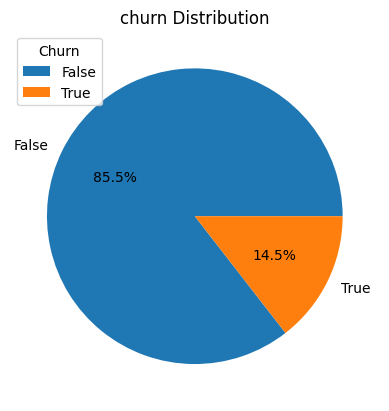

In [15]:
plt.pie(c, labels=c.index, autopct='%1.1f%%')

plt.title('churn Distribution')
plt.legend(title='Churn')
plt.show()

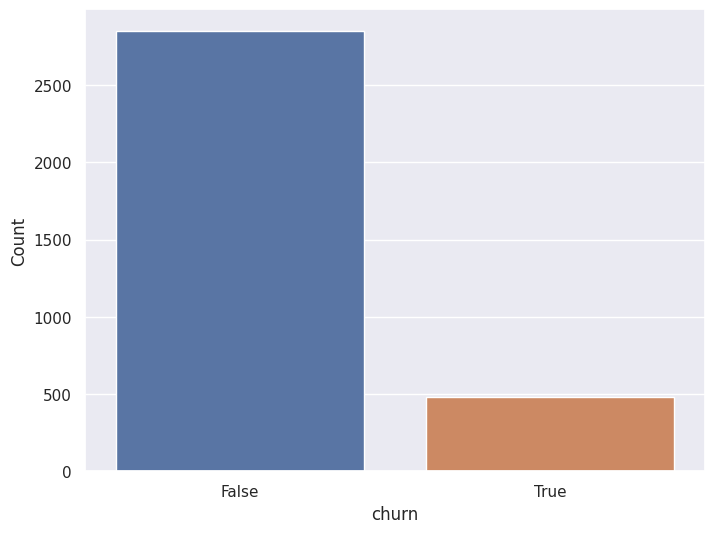

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=t, x='Churn', order=c.index)

# Add labels and title
plt.xlabel('churn')
plt.ylabel('Count')

# Show the plot
plt.show()

In [22]:
t.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [23]:
t['Churn']=t['Churn'].astype('object')

In [24]:
t.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                      object
dtype: object

In [27]:
t.groupby('State')['Churn'].value_counts()

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: count, Length: 102, dtype: int64

In [29]:
t.groupby(['State','Churn']).size().unstack()

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


<Axes: xlabel='State'>

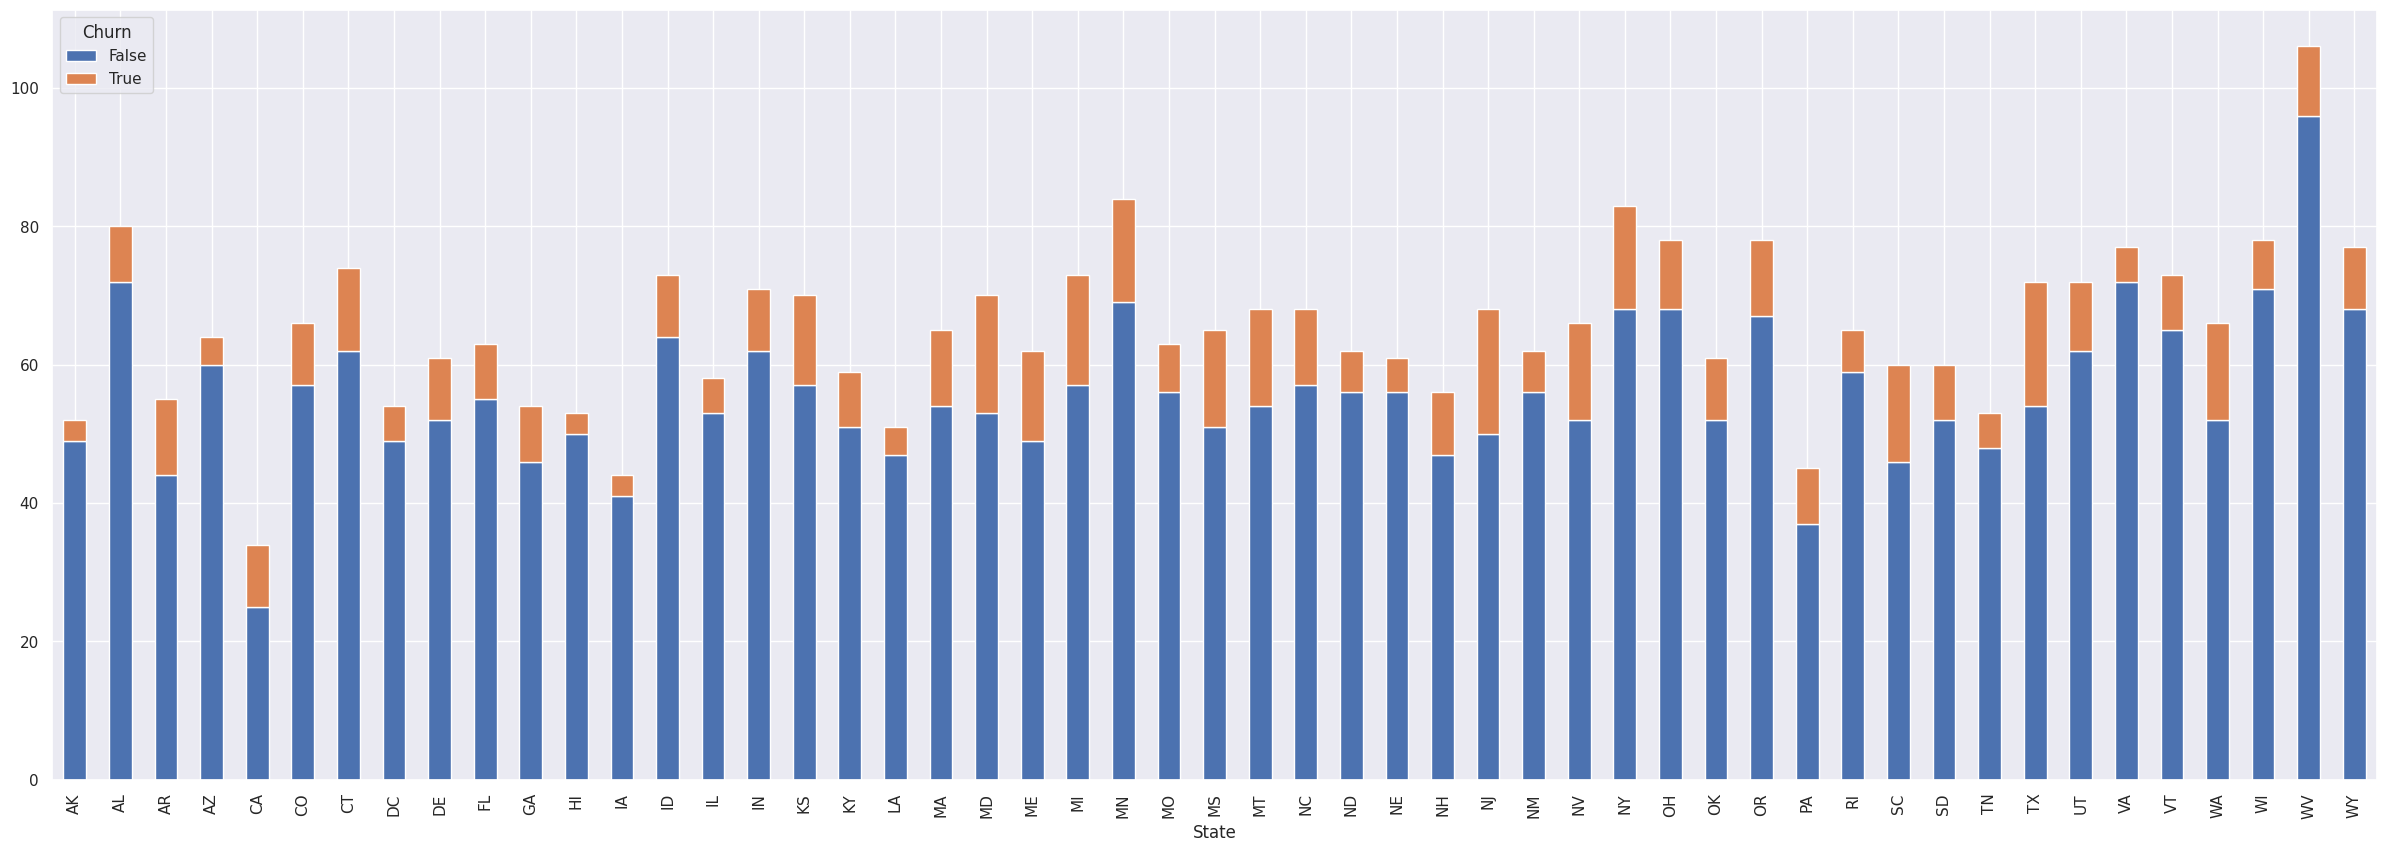

In [28]:
t.groupby(['State','Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

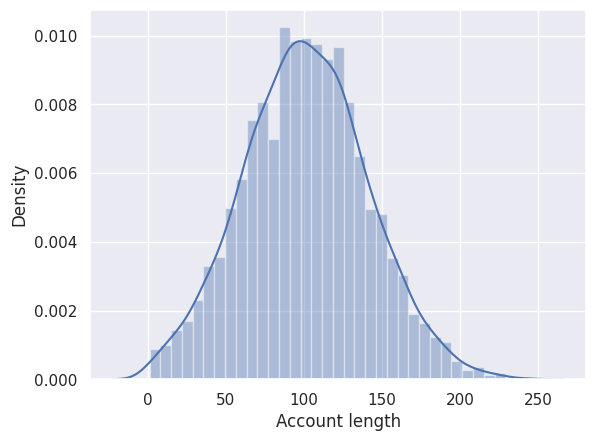

In [30]:
sns.distplot(t['Account length'])

# display the plot
plt.show()

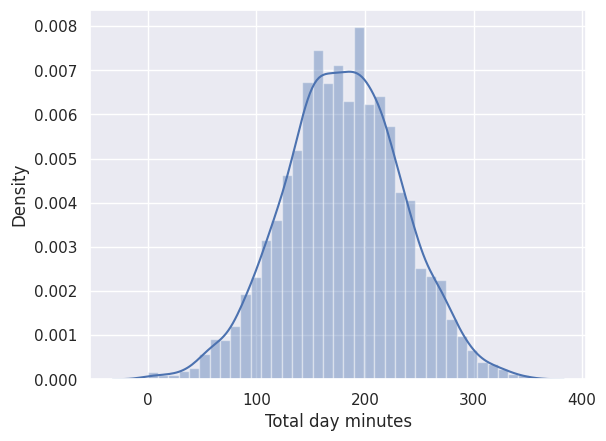

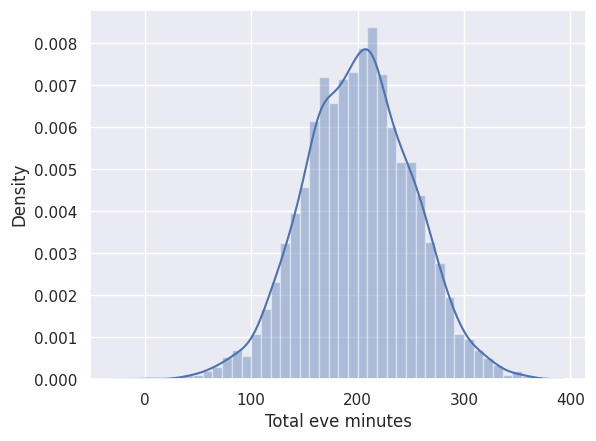

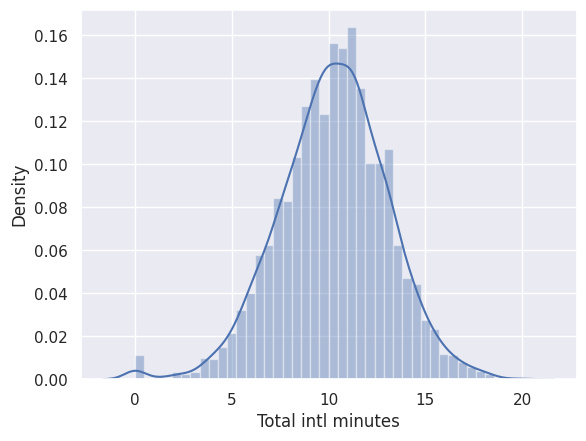

In [31]:
sns.distplot(telcom['Total day minutes'])
plt.show()
sns.distplot(telcom['Total eve minutes'])
plt.show()
sns.distplot(telcom['Total intl minutes'])
plt.show()

In [33]:
t.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [34]:
duplicate_rows = t[t.duplicated()]
duplicate_rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


In [46]:
t.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [63]:
bool_columns = t.select_dtypes(include=['bool']).columns
print(bool_columns)



Index(['Churn'], dtype='object')


In [64]:
t[bool_columns] = t[bool_columns].astype(int)

In [51]:
t.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [65]:
t[['International plan','Voice mail plan']] = t[['International plan','Voice mail plan']].apply(lambda x: x.map({'No': 0, 'Yes': 1}))
# see the results
t[['International plan','Voice mail plan','Churn']].head()

,International plan,Voice mail plan,Churn
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,0


In [66]:
t

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
3329,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3330,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3331,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [67]:
t = t.drop('State', axis=1)
# Calculate the correlation matrix
corr_matrix = t.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop the correlated features from the dataset
t = t.drop(t[to_drop], axis=1)

t.head()

['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
1,65,415,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1
2,161,415,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0


In [68]:
t['Total intl calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

In [69]:
features_to_scale = [column for column in t.columns if column not in ['International plan','Voice mail plan','Churn']]
# print(features_to_scale)
telcom_scaled = StandardScaler().fit_transform(t[features_to_scale])

# Add column names back for readability
telcom_scaled_df = pd.DataFrame(telcom_scaled, columns=features_to_scale)

# summary statistics
print(telcom_scaled_df.describe())

# final preprocessed dataframe
t = pd.concat([telcom_scaled_df, t[['International plan', 'Voice mail plan','Churn']]], axis=1)

       Account length     Area code  Total day minutes  Total day calls  \
count    3.333000e+03  3.333000e+03       3.333000e+03     3.333000e+03   
mean     1.449652e-16  4.263683e-16      -3.155125e-16    -1.982612e-16   
std      1.000150e+00  1.000150e+00       1.000150e+00     1.000150e+00   
min     -2.513172e+00 -6.888343e-01      -3.301096e+00    -5.005247e+00   
25%     -6.797448e-01 -6.888343e-01      -6.624241e-01    -6.695701e-01   
50%     -1.627644e-03 -5.236033e-01      -6.887677e-03     2.812491e-02   
75%      6.513740e-01  1.718817e+00       6.725198e-01     6.759846e-01   
max      3.564766e+00  1.718817e+00       3.140422e+00     3.217588e+00   

       Total eve minutes  Total eve calls  Total night minutes  \
count       3.333000e+03     3.333000e+03         3.333000e+03   
mean       -7.568037e-17     3.309684e-16         8.100997e-17   
std         1.000150e+00     1.000150e+00         1.000150e+00   
min        -3.963622e+00    -5.025911e+00        -3.513648e+

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score


In [71]:
clf = LogisticRegression()
X = t.drop(telcom[['Churn']], axis=1)

# create target variable
y = t['Churn']

# Create training and testing sets (here 80% of the data is used for training.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Fit to the training data
clf.fit(X_train, y_train)

# The predicted labels of classifier
y_pred = clf.predict(X_test)

In [72]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

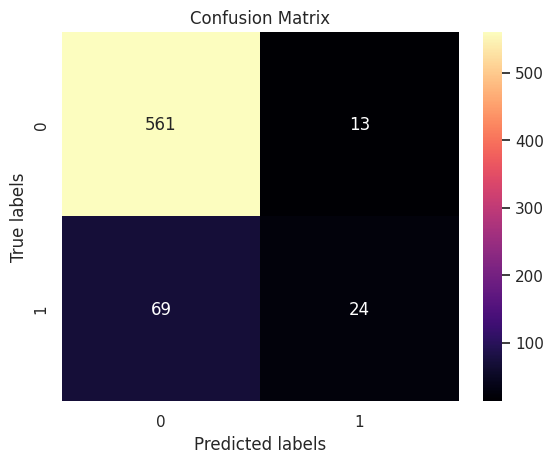

In [73]:
matrix = confusion_matrix(y_test, y_pred)
# print(matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(matrix, annot=True, fmt='d', cmap='magma')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       574
           1       0.65      0.26      0.37        93

    accuracy                           0.88       667
   macro avg       0.77      0.62      0.65       667
weighted avg       0.86      0.88      0.85       667



In [77]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.88
Precision: 0.65
Recall: 0.26
F1 score: 0.37


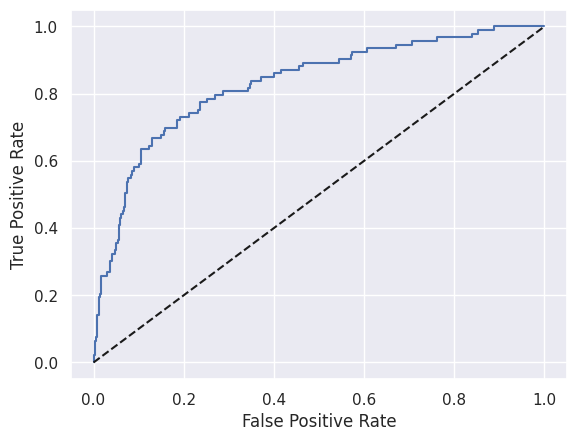

In [78]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Use roc_curve() to calculate the false positive rate, true positive rate, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [79]:
roc_auc_score(y_test, y_pred_prob)

0.8296804166198344

In [82]:
def prediction(customer):
    prediction = clf.predict(customer)
    if prediction[0] == 1:
        print("[1] The customer will Churn.")
    else:
        print("[0] The customer will not Churn")

In [83]:
new_customer = [[0.5257967737031338,
                  -0.5236032802413713,
                  0.9387740897371452,
                  1.5730210856813158,
                  0.8326323403400316,
                  -0.0559403500169171,
                  -0.3653036104833324,
                  -2.20323162813801,
                  0.27323229022856793,
                  -1.0075595662585095,
                  -1.1882184955849664,
                  1.0,
                  0.0]]

prediction(new_customer)


[1] The customer will Churn.
